## Rationales Aggregation Distributions

In [1]:
import json
import pandas as pd
import numpy as np
import math
from statistics import NormalDist

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

pd.options.display.float_format = '{:.2f}'.format

In [2]:
def param_default():
    return {
        'datasets' : {
            'SG_BD' : 'code_completion_random_cut_5k_30_512_tokens', 
            'DC_SG_BD' : 'code_completion_docstring_random_cut_3.8k_30_150_tokens', 
            'DC_SG' : 'code_completion_docstring_signature_3.8k_30_150_tokens', 
            'DC': 'code_completion_docstring_5k_30_150_tokens'
        },
        'level': 'level_1',
        'plot_values_results' : '/workspaces/code-rationales/data/plot_values_results', 
    }
params = param_default()

### Get aggregated results

In [3]:
def get_aggregated_results(dataset, level):
    file_path = params['plot_values_results'] + '/' + dataset + '___' + level + '.csv'
    aggregated_results = pd.read_csv(file_path, index_col=[0])
    aggregated_results = aggregated_results.sort_index().sort_index(axis=1)
    return aggregated_results


In [4]:
def create_df_rationales_distributions():  
    plot_data = {'Values': [],'Dataset': []}
    for dataset_id, dataset in params['datasets'].items():
        aggregated_results = get_aggregated_results(dataset, params['level']).values.flatten().tolist()
        plot_data['Values'] += aggregated_results
        plot_data['Dataset'] += [dataset_id]*len(aggregated_results)
    return pd.DataFrame(plot_data)

In [5]:
df_rationales_distributions = create_df_rationales_distributions()

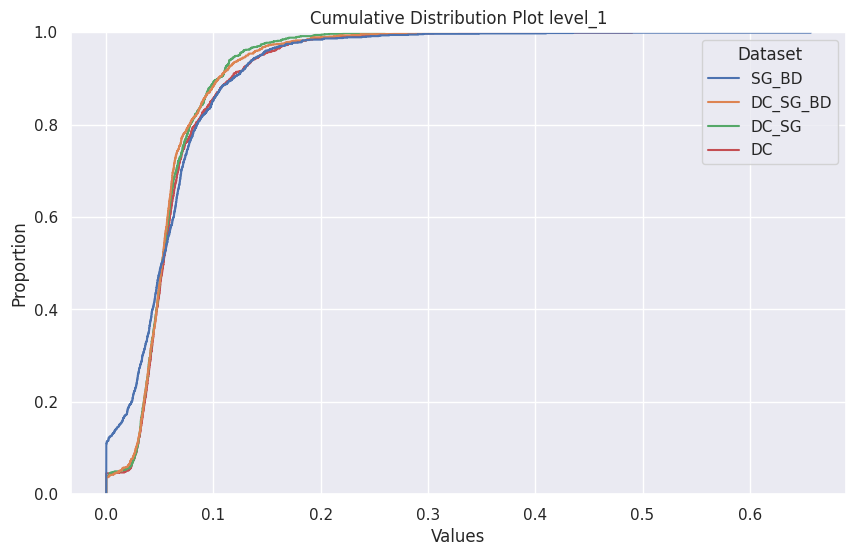

In [6]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_rationales_distributions, x='Values', hue='Dataset', stat='proportion')
plt.title(f'Cumulative Distribution Plot {params["level"]}')
plt.show()

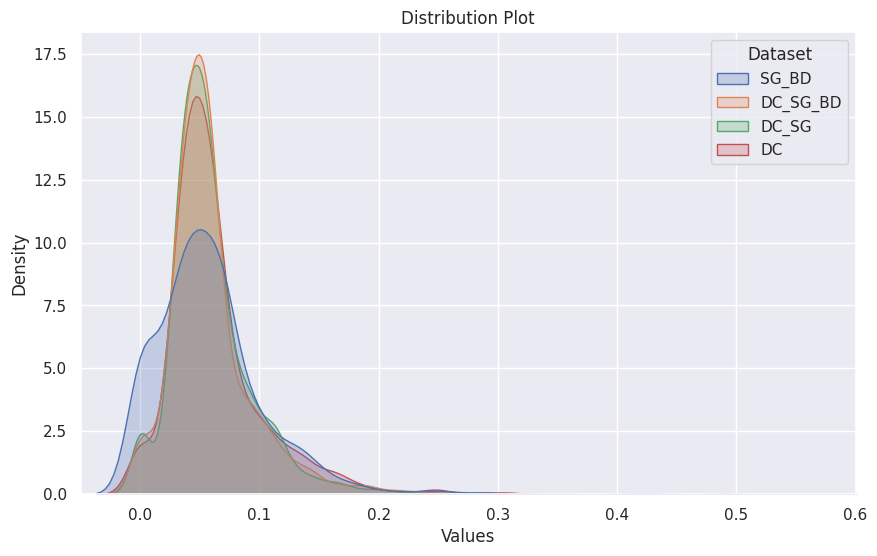

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_rationales_distributions, x='Values', hue='Dataset', common_norm=False, fill=True)
plt.title('Distribution Plot')
plt.xlim(-0.05,0.6)
plt.show()

In [12]:
pd.set_option('display.float_format', lambda x: '%7f' % x)
df_rationales_distributions[df_rationales_distributions['Dataset'] == 'DC'].describe()

,Values
count,1190.000000
mean,0.063094
std,0.042732
min,0.000000
25%,0.038862
50%,0.053488
75%,0.072694
max,0.490344
